In [2]:
import bz2

import sys
import os
from google.colab import drive

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_data(file_path, num_points):

    data = []

    with bz2.open(file_path, 'rt', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if i >= num_points:
                break
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                label = int(parts[0].replace('__label__', ''))
                text = parts[1]
                data.append((label, text))

    print("Loaded", num_points, "lines from", file_path)

    return data

In [4]:
drive.mount('/content/drive')

sys_path = '/content/drive/My Drive/Colab Notebooks/'
sys.path.append(sys_path)

fn_train = os.path.join(sys_path, 'train.ft.txt.bz2')
fn_test = os.path.join(sys_path, 'test.ft.txt.bz2')

Mounted at /content/drive


In [5]:
train_data = load_data(fn_train, 100000)
test_data = load_data(fn_test, 100000)

Loaded 100000 lines from /content/drive/My Drive/Colab Notebooks/train.ft.txt.bz2
Loaded 100000 lines from /content/drive/My Drive/Colab Notebooks/test.ft.txt.bz2


In [6]:
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    MultinomialNB()
)

In [7]:
train_texts = [text for _, text in train_data]
train_labels = [label for label, _ in train_data]
pipeline.fit(train_texts, train_labels)

test_texts = [text for _, text in test_data]
test_labels = [label for label, _ in test_data]
predictions = pipeline.predict(test_texts)
accuracy = accuracy_score(test_labels, predictions)

print("Model accuracy:", accuracy)
print(classification_report(test_labels, predictions))


Model accuracy: 0.84935
              precision    recall  f1-score   support

           1       0.85      0.84      0.85     49421
           2       0.85      0.85      0.85     50579

    accuracy                           0.85    100000
   macro avg       0.85      0.85      0.85    100000
weighted avg       0.85      0.85      0.85    100000



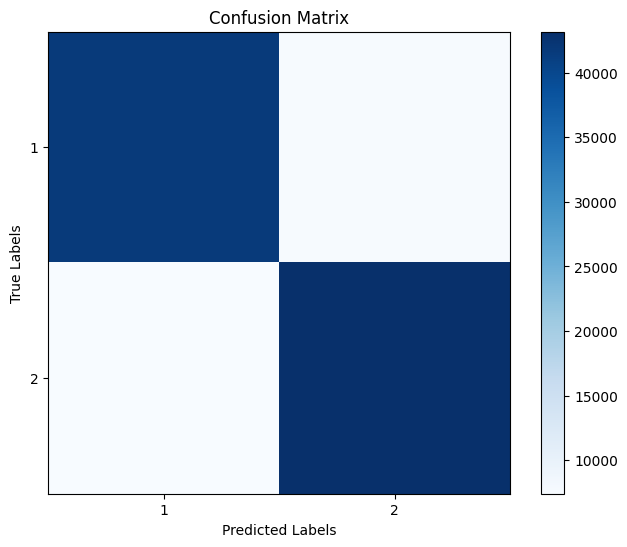

In [8]:
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(set(test_labels)))
plt.xticks(tick_marks, set(test_labels))
plt.yticks(tick_marks, set(test_labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [9]:
train_predictions = pipeline.predict(train_texts)
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Training accuracy:", train_accuracy)
print("Test accuracy:", accuracy)

Training accuracy: 0.86167
Test accuracy: 0.84935


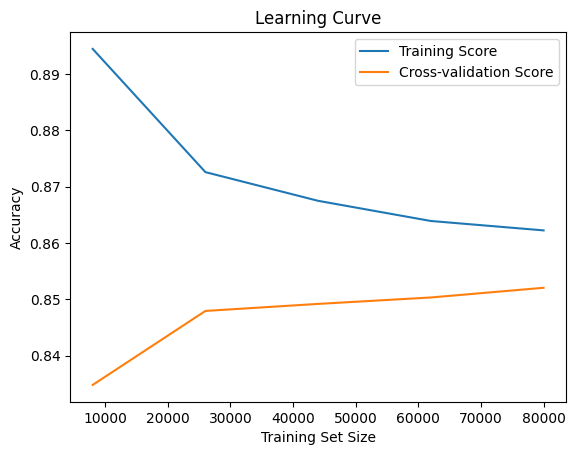

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, train_texts, train_labels, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
def predict_review_sentiment(pipeline, review_text):
  prediction = pipeline.predict([review_text])[0]
  sentiment = "Positive" if prediction == 2 else "Negative"
  return sentiment

while True:
    user_review = input("Enter a review to analyze its sentiment (or type 'exit' to quit): ")

    # Break the loop if the user enters "exit"
    if user_review.lower() == "exit":
        print("Exiting sentiment analysis. Goodbye!")
        break

    predicted_sentiment = predict_review_sentiment(pipeline, user_review)
    print(f"The sentiment for the review is: {predicted_sentiment}")


Enter a review to analyze its sentiment (or type 'exit' to quit): 123
The sentiment for the review is: Positive
Enter a review to analyze its sentiment (or type 'exit' to quit): exit
Exiting sentiment analysis. Goodbye!
